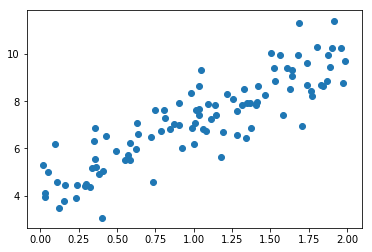

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Etape 1: generer les datas: 

x=2 * np.random.rand(100,1)
y=4 + 3 * x + np.random.randn(100,1)

plt.scatter(x,y)

In [2]:
# Construction de la variable X en concatenant 1 
X_b=np.c_[np.ones((100,1)), x]
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=I_2

# Methode de la Descente du Gradient (batch gradient descent)

In [3]:
# Pour minimiser la fonction de Cout: 
# Convergence assuree grace a la convexite du la fonction cout: 
# Beta_(i+1) <- Beta_i - eta * df/dBeta (MSE(Beta))
# gradient (MSE(beta))= 2/m * X^t . (X.beta - Y)

learning_rate=0.1 # taux d'apprentissage 
n_epochs=1000
m=100 # nombre d'observation qui suit la dimension du X_b la haut !!
thetas= np.random.randn(2,1) # initialisation aleatoire; 
for epoch in range(n_epochs):
    gradients= 2/m * X_b.T.dot(X_b.dot(thetas) - y ) #ici batch
    thetas = thetas - learning_rate * gradients
    

In [4]:
thetas

array([[ 4.27583011],
       [ 2.83551386]])

# Normalisation

 Quand une variable beta1 par ex, est plus petite que beta2, l'algo de la descente s'attend a 
 une variation bcp plus important de beta1 pour affecter la fonction cout. la convergence
 mettra bcp plus de temps.
 FAUT tjrs avoir le meme echelle de tous les variables.


### Avec NumPy

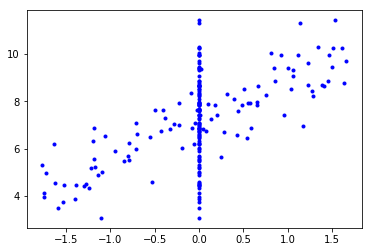

In [5]:
Eps=0.000001
X_norm = (X_b - X_b.mean(axis=0)) / (X_b.std(axis=0)+ Eps) 
# attention:Eps=0 on aura division par Zero;

plt.plot(X_norm,y,"b.")

### avec Scikit_learn

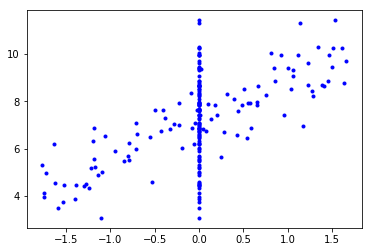

In [6]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_norm=Scaler.fit_transform(X_b)
plt.plot(X_norm,y,"b.")

### SKlearn Norme

In [7]:
#changement D'echelle: 
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_norm,y)
lin_reg.intercept_, lin_reg.coef_ #  cste (B0) &  poids (Bi)
# Normaliser avec Transform !!! et prediction: 
X_norm_b=Scaler.transform(X_new_b)
Y_predict_new=lin_reg.predict(X_norm_b) 
Y_predict_new

array([[ 4.27583011],
       [ 9.94685784]])

### Batch gradient Descent Norme 

In [10]:
# Changement d'echelle pour Gradient Desc: 
learning_rate=0.05 # taux d'apprentissage 
n_iteration=1000
m=100 # nombre d'observation qui suit la dimension du X_b la haut !!
thetas= np.random.randn(2,1) # ?????
#thetas=Scaler.transform(thetas)
for i in range(n_iteration):
    gradients= 2/m * X_norm.T.dot(X_norm.dot(thetas) - y ) # a chaque etape on utilise l'ens des donnees!!
    thetas= thetas - learning_rate * gradients
thetas

array([[ 0.82467171],
       [ 1.62407625]])